<a href="https://colab.research.google.com/github/ibader85/UnstructuredDataAnalytics/blob/main/03_Introduction_to_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

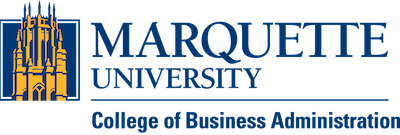

#BUAN4060: Unstructured Data Analytics

##03 Introduction to Sentiment Analysis

##Instructor: Dr. Badar Al Lawati "Dr. B"

**Acknowledgment:** This material is based on the content created by `Prof. Timothy E. Carone`

**R on Colab:**

* You can change the runtime from Python to R, by clicking on the down arrow next to Connect, and picking "Change Runtime Type"

* You can change the project name by clicking on the title on top of this page

* You can export your notebook by going to File > Download .ipynb



## 1. Text Analytics

Text Mining and Sentiment Analysis can provide interesting insights when used to analyze free form text like social media posts, customer reviews, feedback comments, and survey responses. Key phrases extracted from these text sources are useful to identify trends and popular topics and themes. Sentiment scores provide a way to perform quantitative analysis on text data. Combining these techniques, using visually engaging dashboards will help unlock the value of your text data.

Social media posts, customer reviews and feedback, survey responses to open-ended questions, or pretty much any free form text can be analyzed. Have you wondered about how to visualize the outcome of such analysis, create dashboards and share it with relevant people in your company? You can use R and other software that data scientists are expert in to provide you with analytics for decision-making and planning.

Sentiment analysis returns a sentiment score between 0 and 1 for each set of text, where 1 is the most positive and 0 is the most negative score. It is useful to find out what customers think of your brand or topic by analyzing raw text for clues about positive or negative sentiment.

Suppose you have project teams that each manage the product development for a different airline. The team monitors social media for comments on your product at a particular airline. You, as overall PM, aggregate these comments and want to know the sentiment of the comments. Here is a graph that shows the overall positive, negative, and neutral sentiment for your product at all airlines.

In [1]:
install.packages("ggplot2") # Data visualization
install.packages("readr") # CSV file I/O, e.g. the read_csv function
install.packages("tm") # text preprocessing and analysis, including text tokenization, stemming, and creating document-term matrices
install.packages("SnowballC") # Provides stemming algorithms for text mining
install.packages("RColorBrewer") # Offers color palettes for data visualization, particularly useful with ggplot2
install.packages("wordcloud") # Allows you to create word clouds for text data
install.packages("biclust") # package for biclustering, which is a technique for simultaneous clustering of rows and columns in data matrices
install.packages("cluster") # Provides various clustering algorithms, such as k-means and hierarchical clustering.
install.packages("igraph") # Used for creating and analyzing graphs and networks
install.packages("fpc") # Offers functions for clustering validation and selection of the number of clusters

install.packages("gridExtra") # Libraries for arranging and combining multiple plots in a single display
install.packages("cowplot") # Libraries for arranging and combining multiple plots in a single display
install.packages("reshape2") # Part of the tidyverse, used for data reshaping and formatting for visualization
install.packages("scales") # Part of the tidyverse, used for data reshaping and formatting for visualization


library(ggplot2) # Data visualization
library(readr) # CSV file I/O, e.g. the read_csv function
library(tm)
library(SnowballC)
library(RColorBrewer)
library(wordcloud)
library(biclust)
library(cluster)
library(igraph)
library(fpc)

library(gridExtra)
library(cowplot)
library(reshape2)
library(scales)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘modeltools’, ‘flexclust’, ‘additivityTests’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘D

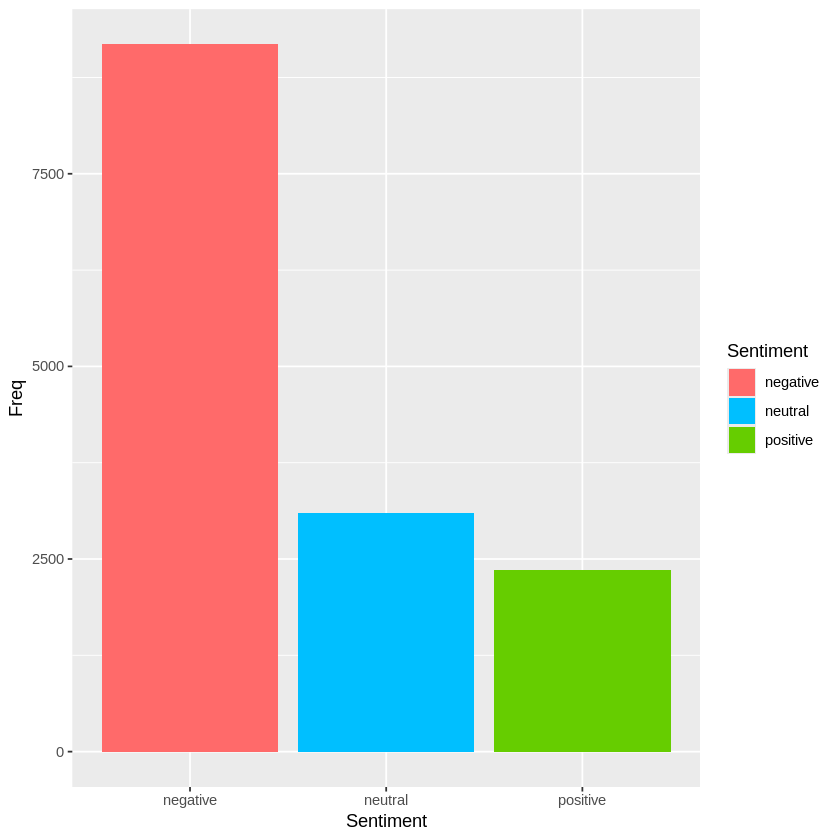

In [2]:
# LOAD THE DATASET
airline = read.csv("Tweets.csv")

# 1. Plot of summary global sentiment

overallSentiment = as.data.frame(table(airline$airline_sentiment))
# Calculate the frequency of each sentiment category ("negative," "neutral," and "positive") in the "airline_sentiment" column
# of the "airline" data frame using the table function
# The result is stored in a data frame called "overallSentiment

colnames(overallSentiment) = c("Sentiment","Freq")
# Set the column names of the "overallSentiment" data frame to "Sentiment" and "Freq" to make it more readable


histPlot1 = ggplot(overallSentiment) + aes(x=Sentiment, y=Freq, fill=Sentiment) + scale_fill_manual(values=c("indianred1","deepskyblue","chartreuse3"))
# Initialize a ggplot object called "histPlot1" and specifies the data source as the "overallSentiment" data frame
# It uses the aes function to define aesthetics for the plot, where "x" represents the "Sentiment" column, "y" represents the
# "Freq" (frequency) column, and "fill" is used to specify the fill color based on the "Sentiment" column
# The scale_fill_manual function sets custom fill colors for the different sentiment categories
# In this case, "indianred1" is assigned to "negative," "deepskyblue" to "neutral," and "chartreuse3" to "positive.”

histPlot1 = histPlot1 + geom_bar(stat="identity")
# adds a bar chart layer to the "histPlot1" ggplot object using geom_bar
# The "stat" argument is set to "identity," indicating that the height of each bar should correspond to the "Freq" values in the data

histPlot1

Here is a graph that shows the overall positive, negative, and neutral sentiment for your product at each of the airlines.

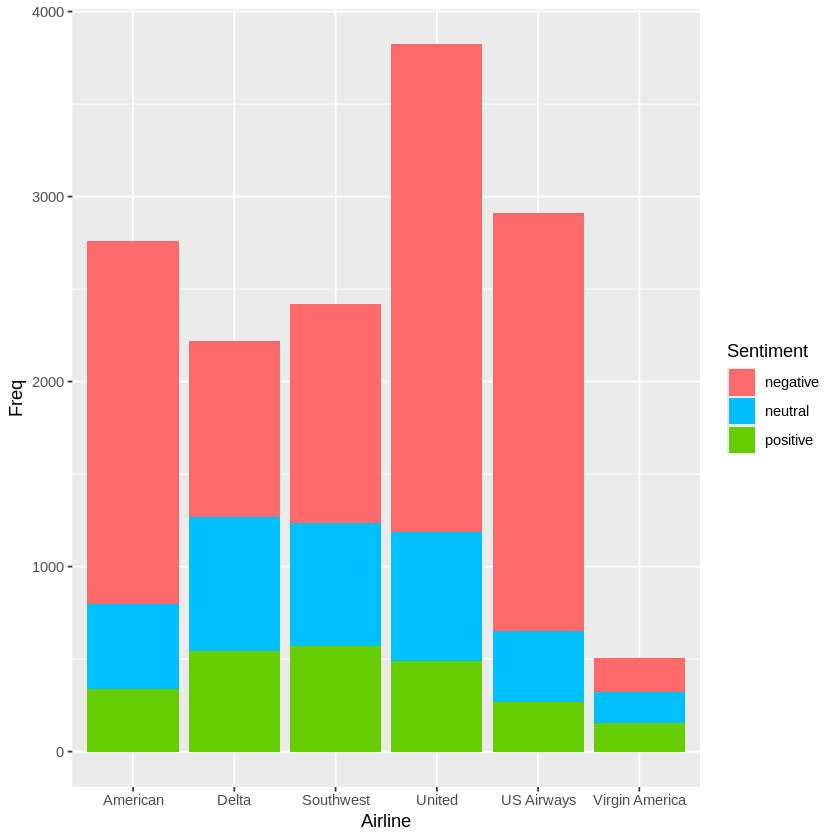

In [3]:
# 2. Repeat the histogram plot but showing the number of tweets + sentiment each airline has

airlineSentiment = as.data.frame(table(airline$airline,airline$airline_sentiment))
# Calculate the frequency of each sentiment category ("negative," "neutral," and "positive") for each airline in the "airline"
# data frame using the table function
# The result is stored in a data frame called "airlineSentiment," which includes columns for "Airline," "Sentiment," and "Freq."

colnames(airlineSentiment) = c("Airline","Sentiment","Freq")
# Set the column names of the "airlineSentiment" data frame to "Airline," "Sentiment," and "Freq" to make it more readable.

colours = c("firebrick1","deepskyblue","chartreuse3")
# define a vector called "colours" that specifies the fill colors for the different sentiment categories
# "firebrick1" is assigned to "negative," "deepskyblue" to "neutral," and "chartreuse3" to "positive."

histPlot2 = ggplot(airlineSentiment) + aes(x=Airline,y=Freq,fill=Sentiment) + scale_fill_manual(values=c("indianred1","deepskyblue","chartreuse3"))
# Initialize a ggplot object called "histPlot2" and specifies the data source as the "airlineSentiment" data frame
# It uses the aes function to define aesthetics for the plot, where "x" represents the "Airline" column, "y" represents the "Freq"
# (frequency) column, and "fill" is used to specify the fill color based on the "Sentiment" column
# The scale_fill_manual function sets custom fill colors for the different sentiment categories using the "colours" vector

histPlot2 = histPlot2 + geom_bar(stat="identity")
# Add a bar chart layer to the "histPlot2" ggplot object using geom_bar
# The "stat" argument is set to "identity," indicating that the height of each bar should correspond to the "Freq" values in the data

histPlot2

Here are piecharts that show the overall positive, negative, and neutral sentiment for your product at each of the airlines.

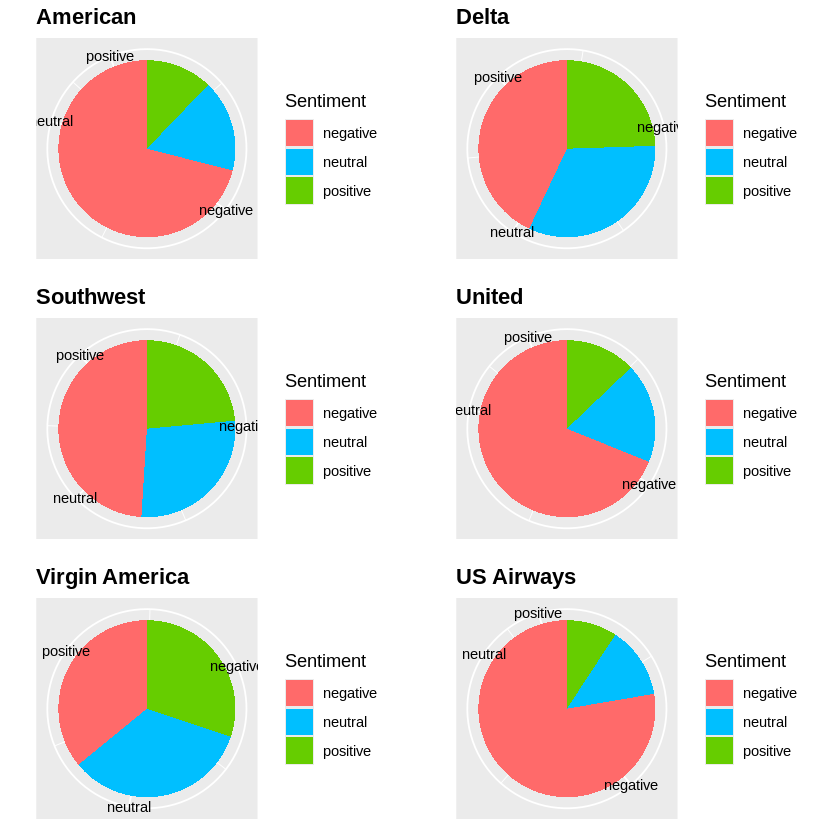

In [4]:
# 2.1. Individual pie charts for each Airline

# AMERICAN AIRLINES ##############################################
sentAmerican = subset(airlineSentiment, Airline == "American")
# Create a subset of the "airlineSentiment" data frame where the "Airline" column is equal to "American."
# It selects the rows corresponding to the American airline's sentiment data

American = ggplot(sentAmerican) + aes(x="American", y=Freq, fill=Sentiment) +
  geom_bar(stat="identity") +
  coord_polar("y") +
  theme(axis.text.x=element_text(color="black")) +
  theme(axis.ticks=element_blank(), axis.title=element_blank(), axis.text.y=element_blank())

y.breaks = cumsum(sentAmerican$Freq) - sentAmerican$Freq/2
# Calculate the y-axis breaks for the polar bar chart. It computes the cumulative sum of the "Freq" column in the
# "sentAmerican" data frame and then subtracts half of each "Freq" value to position the labels in the center of each bar

American = American + scale_y_continuous(breaks=y.breaks, labels=sentAmerican$Sentiment) +
  ggtitle("American") + theme(plot.title = element_text(face="bold")) + scale_fill_manual(values=c("indianred1","deepskyblue","chartreuse3"))
# adds the y-axis breaks and labels to the "American" ggplot object using scale_y_continuous
# It positions the labels at the calculated y.breaks and uses sentiment values from the "Sentiment" column

# DELTA AIRLINES  #####################################################
sentDelta = subset(airlineSentiment, Airline == "Delta")
Delta = ggplot(sentDelta) + aes(x="Delta", y=Freq, fill=Sentiment) +
  geom_bar(stat="identity") +
  coord_polar("y") +
  theme(axis.text.x=element_text(color="black")) +
  theme(axis.ticks=element_blank(), axis.title=element_blank(), axis.text.y=element_blank())

y.breaks = cumsum(sentDelta$Freq) - sentDelta$Freq/2

Delta = Delta + scale_y_continuous(breaks=y.breaks, labels=sentDelta$Sentiment) +
  ggtitle("Delta") + theme(plot.title = element_text(face="bold")) + scale_fill_manual(values=c("indianred1","deepskyblue","chartreuse3"))

# SOUTHWEST AIRLINES  #####################################################
sentSouthwest = subset(airlineSentiment, Airline == "Southwest")
Southwest = ggplot(sentSouthwest) + aes(x="Southwest", y=Freq, fill=Sentiment) +
  geom_bar(stat="identity") +
  coord_polar("y") +
  theme(axis.text.x=element_text(color="black")) +
  theme(axis.ticks=element_blank(), axis.title=element_blank(), axis.text.y=element_blank())

y.breaks = cumsum(sentSouthwest$Freq) - sentSouthwest$Freq/2

Southwest = Southwest + scale_y_continuous(breaks=y.breaks, labels=sentSouthwest$Sentiment) +
  ggtitle("Southwest") + theme(plot.title = element_text(face="bold")) + scale_fill_manual(values=c("indianred1","deepskyblue","chartreuse3"))

# UNITED AIRLINES  #####################################################
sentUnited = subset(airlineSentiment, Airline == "United")
United = ggplot(sentUnited) + aes(x="United", y=Freq, fill=Sentiment) +
  geom_bar(stat="identity") +
  coord_polar("y") +
  theme(axis.text.x=element_text(color="black")) +
  theme(axis.ticks=element_blank(), axis.title=element_blank(), axis.text.y=element_blank())

y.breaks = cumsum(sentUnited$Freq) - sentUnited$Freq/2

United = United + scale_y_continuous(breaks=y.breaks, labels=sentUnited$Sentiment) +
  ggtitle("United") + theme(plot.title = element_text(face="bold")) + scale_fill_manual(values=c("indianred1","deepskyblue","chartreuse3"))

# VIRGIN AMERICA  #####################################################
sentVAirways = subset(airlineSentiment, Airline == "Virgin America")
VAirways = ggplot(sentVAirways) + aes(x="Virgin America", y=Freq, fill=Sentiment) +
  geom_bar(stat="identity") +
  coord_polar("y") +
  theme(axis.text.x=element_text(color="black")) +
  theme(axis.ticks=element_blank(), axis.title=element_blank(), axis.text.y=element_blank())

y.breaks = cumsum(sentVAirways$Freq) - sentVAirways$Freq/2

VAirways = VAirways + scale_y_continuous(breaks=y.breaks, labels=sentVAirways$Sentiment) +
  ggtitle("Virgin America") + theme(plot.title = element_text(face="bold")) + scale_fill_manual(values=c("indianred1","deepskyblue","chartreuse3"))

# US AIRWAYS  #####################################################
sentUSAirways = subset(airlineSentiment, Airline == "US Airways")
USAirways = ggplot(sentUSAirways) + aes(x="US Airways", y=Freq, fill=Sentiment) +
  geom_bar(stat="identity") +
  coord_polar("y") +
  theme(axis.text.x=element_text(color="black")) +
  theme(axis.ticks=element_blank(), axis.title=element_blank(), axis.text.y=element_blank())

y.breaks = cumsum(sentUSAirways$Freq) - sentUSAirways$Freq/2

USAirways = USAirways + scale_y_continuous(breaks=y.breaks, labels=sentUSAirways$Sentiment) +
  ggtitle("US Airways") + theme(plot.title = element_text(face="bold")) + scale_fill_manual(values=c("indianred1","deepskyblue","chartreuse3"))


plot_grid(American,Delta,Southwest,United,VAirways,USAirways,ncol=2,nrow=3)

Each of these visualizations were produced by taking all the social media content and use sentiment analysis to determine how people feel about your product. Why is your product doing so well at Virgin America and so poorly at the other airlines? The sentiment analysis tells you something is wrong at most airlines with your product and you have to take a deeper dive.